# Epsilon Greedy Algorithm  

The epsilon-Greedy algorithm is almost a greedy algorithm
because it generally exploits the best available option, but every once in a while the epsilon-Greedy algorithm explores the other available options. As the term epsilon in the algorithm’s name refers to the odds that the algorithm explores instead of exploiting.

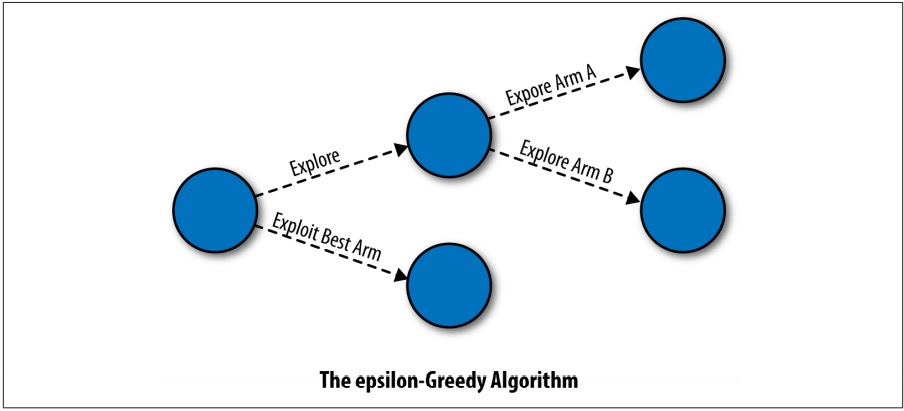

In [ ]:
import random
import numpy as np
import pandas as pd
import altair as alt

With the algorithm setup for Epsilon Greedy, we need to discuss the distribution of the arm/action. Think of each arm/action as a coin flip. The outcome of a coin flip is of a dichotomous nature, either Heads or Tails. Thus, we can implement a Bernoulli distribution for each arm. This essentially becomes our Reward information distribution system for each arm. Each arm provides i.i.d. rewards from a Bernoulli distribution with mean
given in the table below. 

Arm Arm 1 Arm 2 Arm 3 Arm 4 Arm 5

Mean 0.4 0.3 0.5 0.2 0.1

In [ ]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p
    
    # Reward system based on Bernoulli
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [ ]:
def test_algorithm(algo, arms, num_sims, horizon):
    
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims *horizon)]
    times = [0.0 for i in range (num_sims*horizon)]
    
    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim -1) * horizon + t -1
            sim_nums[index] = sim
            times[index] = t
            
            # Selection of best arm and engaging it
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            
            # Engage chosen Bernoulli Arm and obtain reward info
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            if t ==1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index-1] + reward
                
            algo.update(chosen_arm, reward)
    
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

epsilon : This will be a floating point number that tells us the frequency with which we should explore one of the available arms. If we set epsilon = 0.1, then we’ll explore the available arms on 10% of our pulls.

counts : A vector of integers of length N that tells us how many times we’ve played each of the N arms available to us in the current bandit problem. If there are two arms, Arm 1 and Arm 2, which have both been played twice, then we’ll set counts = [2, 2].

values : A vector of floating point numbers that defines the average amount of reward we’ve gotten when playing each of the N arms available to us. If Arm 1 gave us 1 unit of  reward on one play and 0 on another play, while Arm 2 gave us 0 units of reward on both plays, then we’ll set values = [0.5, 0.0].

select_arm : Every time we have to make a choice about which arm to pull, we want to be able to simply make a call to our favorite algorithm and have it tell us the numeric name of the arm we should pull. This select_arm method that is called without any arguments and which returns the index of the next arm to pull. 
### Working :
The epsilon-Greedy algorithm handles selecting an arm in two parts: (1) we flip a coin to see if we’ll choose the best arm we know about and then (2) if the coin comes up tails, we’ll select an arm completely at random. 
In Python, we’ve implemented this by checking if a randomly generated number is greater than epsilon. If so, our algorithm selects the arm whose cached value according to the values field is highest; otherwise, it selects an arm at random.
These few lines of code completely describe the epsilon-Greedy algorithm’s solution to the Bandit problem: it explores some percentage of the time and otherwise chooses the arm it thinks is best. But, to understand which arm our epsilon-Greedy algorithm considers best, we need to define the update function.


update : After we pull an arm, we get a reward signal back from our system. We want to update our algorithm’s beliefs about the quality of the arm we just chose by providing this reward information. An update function takes as arguments (1) an algorithm object, (2) the numeric index of the most recently chosen arm and (3) the reward received from choosing that arm. The update method will take this information and make the relevant changes to the algorithm’s evaluation of all of the arms.

### Working of update function :
The update function first increments the counts field that records the number of times we’ve played each of the arms for this bandit problem to reflect the chosen arm. Then it finds the current estimated value of the chosen arm. If this is our first experience ever with the chosen arm, we set the estimated value directly to the reward we just received from playing that arm. If we had played the arm in the past, we update the estimated value of the chosen arm to be a weighted average of the previously estimated value and the reward we just received. This weighting is important, because it means that single bservations mean less and less to the algorithm when we already have a lot of experience with any specific option. The specific weighting we’ve chosen is designed to insure that the estimated value is exactly equal to the average of the rewards we’ve gotten from each arm.

In [ ]:
class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts # Count represent counts of pulls for each arm. For multiple arms, this will be a list of counts.
        self.values = values # Value represent average reward for specific arm. For multiple arms, this will be a list of values.
        return 
    
    # Initialise k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    
    # Epsilon greedy arm selection
    def select_arm(self):
        # If prob is not in epsilon, do exploitation of best arm so far
        if random.random() > self.epsilon:
            return np.argmax(self.values)
        # If prob falls in epsilon range, do exploration
        else:
            return random.randrange(len(self.values))
    
    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update average/mean value/reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n-1)/float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

# Following code with the notable highlights:

Created 5 arms with given means.

Save simulation output to a tab-separated file

Create 5000 independent simulations for each epsilon value for a total of 5 epsilon values ranging from 0.05 to 0.7.

The choice for 5000 independent simulations is because we want to determine the average performance. Each simulation might be subject to the stochastic nature/run and the performances might be skewed due to random chance. Thus it is important to run a reasonably high number of simulations to evaluate the average mean/performance.

In [ ]:
import random

random.seed(1)
# out of 5 arms, 1 arm is the best
means = [0.4, 0.3, 0.5, 0.2, 0.1]
n_arms = len(means)

# Create list of Bernoulli Arms with Reward Information
arms = list(map(lambda mu: BernoulliArm(mu), means))
print("Best arm is " + str(np.argmax(means)))

f = open("epsg_results.tsv", "w+")

# Create simulations for each exploration epsilon value
for epsilon in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.7]:
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 250)
    
    # Store data
    for i in range(len(results[0])):
        f.write(str(epsilon) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
f.close()
print("Simulation done, you can check the result Now")

Best arm is 2
Simulation done, you can check the result Now


In [ ]:
df=pd.read_csv("/content/epsg_results.tsv",sep = "\t", header = None, names = ["epsilon", "simulation_num", "step", "chosen_arm", "reward", "cum_reward"])
df.head()

,epsilon,simulation_num,step,chosen_arm,reward,cum_reward
0,0.05,1,1,0,0.0,0.0
1,0.05,1,2,0,1.0,1.0
2,0.05,1,3,0,0.0,1.0
3,0.05,1,4,0,0.0,1.0
4,0.05,1,5,0,1.0,2.0


In [ ]:

# Create a flag for each step to see if best arm was chosen
df["chose_correct"] = np.select(
    [
        df["chosen_arm"] == 2,
        df["chosen_arm"] != 2
    ],
    [
        1,
        0
    ]
)

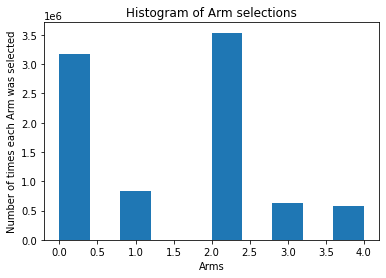

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["chosen_arm"])
plt.title('Histogram of Arm selections')
plt.xlabel('Arms')
plt.ylabel('Number of times each Arm was selected')
plt.show()


In [ ]:

# Perform average/mean for each step for all simulations and epsilon
df_chose_correctly = df.loc[:,["epsilon","step", "chose_correct"]].groupby(["epsilon","step"]).agg("mean")

# Remove multi index grouping
df_chose_correctly = df_chose_correctly.reset_index()

In [ ]:
df_chose_correctly.head()


,epsilon,step,chose_correct
0,0.05,1,0.0100
1,0.05,2,0.0134
2,0.05,3,0.0184
3,0.05,4,0.0254
4,0.05,5,0.0262


In [ ]:

alt.Chart(df_chose_correctly).mark_line().encode(
    alt.X("step:Q", title = "Time Step"),
    alt.Y("chose_correct:Q", title = "Mean Rate of Choosing Best Arm"),
    color = alt.Color("epsilon:N")
).properties(
    title = "Eps-Greedy: Mean Rate of Choosing Best Arm from 5000 Simulations. 5 Arms = [0.4,0.3,0.5,0.2,0.1]",
)

alt.Chart(...)

##Plot the probability of pulling the best arm for each epsilon value.

The epsilon greedy algorithm has asymptotic performance due to its inherent nature of exploration. 
We can observe that the higher the value of epsilon, the lower its asymptotic performance. For example, for 0.7 epsilon, the asymptotic value is actually 40%. This is broken down to 30% for pure exploitation, and an added 10% due to the random exploration (1/5 chance for the remaining 30% for exploration). Likewise, for 0.05 epsilon, the asymptote is around 62%. This is brokwn down to 60% for pure exploitation, and an added 2% due to random exploration (1/5 chance for remaining 10% for exploration).

###The rate of convergence.
If higher the rate of exploration then this algorithm will discovers best arm earlier.This is shown by how rapid the line plots increases (until it hits its asymptote). It is also interesting to note that the rate of best-arm-discovery is not linear, as shown by how epsilon 0.05 seems to be exponentially slower compared to the others.

In [ ]:
df_cumreward = df.loc[:,["epsilon","step", "cum_reward"]].groupby(["epsilon","step"]).agg("mean").reset_index()


In [ ]:
alt.Chart(df_cumreward).mark_line().encode(
    alt.X("step:Q", title = "Time Step"),
    alt.Y("cum_reward:Q", title = "Mean Cumulative Reward"),
    color = alt.Color("epsilon:N")
).properties(
    title = "Eps-Greedy: Mean Cumulative Reward from 5000 Simulations. 5 Arms = [0.4,0.3,0.5,0.2,0.1]",
)

alt.Chart(...)

Looking at the cumulative reward system, within the given time horizon of 250 steps, neither 0.05 nor 0.7 epsilon values are the best performers. The best performer is instead 0.1, which has a combination of fast convergence to best arm exploitation and high asymptote.

In [ ]:
df_cumreward

,epsilon,step,cum_reward
0,0.05,1,0.3832
1,0.05,2,0.7960
2,0.05,3,1.2020
3,0.05,4,1.6006
4,0.05,5,1.9906
...,...,...,...
1745,0.70,246,85.7756
1746,0.70,247,86.1254
1747,0.70,248,86.4776
1748,0.70,249,86.8306


In [ ]:
df_cumreward["best_cumreward"] = df["step"] * max(means)
df_cumreward["regret"] = df_cumreward["best_cumreward"]-  df_cumreward["cum_reward"]

In [ ]:
alt.Chart(df_cumreward).mark_line().encode(
    alt.X("step:Q", title = "Time Step"),
    alt.Y("regret:Q", title = "Mean Cumulative Regret"),
    alt.Color("epsilon:N")
).properties(
    title = "Eps-Greedy: Mean Cumulative Regret from 5000 Simulations. 5 Arms = [0.4, 0.3,0.5,0.2, 0.1]",
)

alt.Chart(...)

As shown, epsilon value of 0.1 is the best which is followed closely by epsilon value of 0.2. The overall cumulative regret ranges between 21 to 22.

#Summary
In this analysis, we have taken a look at the Epsilon Greedy algorithm, and explained the impact of epsilon on the asymptotic reward limit, as well as rate of convergence to the best arm discovery. It should also be noted that the relatively difference in means is a crucial aspect of discovering the best arm.
